# **Description:**
This model is used to search or predict images of fashion styles. An image is sent in to the model to find or search similar images. Model will display similar images of same type. This algorithm helps to users by searching from their visualization...So that users can get results whatever style they want.

# 1. Import Libraries

Let's import required libraries for our task.

In [33]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2.Import Dataset

Let's import a dataset which have all the different styles without any order because we just need to recommend the products based on style.

In [34]:
file_names=[]
for file in os.listdir('images'):
    file_names.append(os.path.join('images',file))

In [35]:
len(file_names)

44441

We are having a total of 44441 files with many different styles.

# 3.Model to extract features

**Create model:** Let's use a pretrained model like ResNet50 which is trained on large set of images from imagenet. Imagenet is the best dataset which is having the best categories of images with a good quality.The Sequence layers in ResNet50 which makes the model most robust.We only train the new layers which are to be added after base model be cause we want to restore the weights of ResNet50 model.Add globalmaxpool layer after base model and there should be no any classification layer as our requirement is not to classify images.

In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable=False
model=Sequential([base_model,GlobalMaxPooling2D()])


In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


This is the image style which we want to make recommendation .

In [53]:
from tensorflow.keras.preprocessing import image
from numpy.linalg import norm
image_path=r"images/16871.jpg"
image1=image.load_img(image_path,target_size=(224,224))
image1=np.array(image1)
image1=np.expand_dims(image1,axis=0)
result=model.predict(image1).flatten()
result=result/norm(result)

1/1 [==============================] - 0s 126ms/step


# 4. Extract features

Let's extract the features from all the images which we want to make matching to user required style.We also normalize our image for better understanding.

In [39]:
def extract_features_from_image(image_path,model):
    image2=image.load_img(image_path,target_size=(224,224))
    image2=np.array(image2)
    image2=np.expand_dims(image2,axis=0)
    result=model.predict(image2).flatten()
    result=result/norm(result)
    return result

Store all the features in the **image_features** list which is further required to make recommendations.

In [41]:
image_features=[]
i=0
for image_path in file_names:
    image_features.append(extract_features_from_image(image_path,model))
    i=i+1
    if i %100==0:
        print(i)
image_features

1/1 [==============================] - 0s 111ms/step
100
1/1 [==============================] - 0s 103ms/step
200
1/1 [==============================] - 0s 116ms/step
300
1/1 [==============================] - 0s 145ms/step
400
1/1 [==============================] - 0s 136ms/step
500
1/1 [==============================] - 0s 102ms/step
600
1/1 [==============================] - 0s 112ms/step
700
1/1 [==============================] - 0s 108ms/step
800
1/1 [==============================] - 0s 126ms/step
900
1/1 [==============================] - 0s 89ms/step
1000
1/1 [==============================] - 0s 111ms/step
1100
1/1 [==============================] - 0s 112ms/step
1200
1/1 [==============================] - 0s 119ms/step
1300
1/1 [==============================] - 0s 113ms/step
1400
1/1 [==============================] - 0s 111ms/step
1500
1/1 [==============================] - 0s 109ms/step
1600
1/1 [==============================] - 0s 143ms/step
1700
1/1 [===================

[array([0.02490353, 0.00898731, 0.        , ..., 0.01112405, 0.        ,
        0.00990626], dtype=float32),
 array([0.        , 0.03107493, 0.        , ..., 0.00226972, 0.04493311,
        0.0195199 ], dtype=float32),
 array([0.00241297, 0.02091009, 0.00305729, ..., 0.00090455, 0.        ,
        0.06973546], dtype=float32),
 array([0.00946524, 0.0286163 , 0.0054536 , ..., 0.        , 0.02454255,
        0.04662369], dtype=float32),
 array([0.00920873, 0.05911998, 0.        , ..., 0.01244497, 0.01878984,
        0.05452708], dtype=float32),
 array([0.00476536, 0.11616263, 0.        , ..., 0.0163577 , 0.        ,
        0.06549452], dtype=float32),
 array([0.00070112, 0.11321165, 0.02236226, ..., 0.03990768, 0.02596581,
        0.05043667], dtype=float32),
 array([0.00520577, 0.01603021, 0.00878843, ..., 0.        , 0.00334777,
        0.02391989], dtype=float32),
 array([0.        , 0.11743478, 0.00441914, ..., 0.02026197, 0.00920544,
        0.07933429], dtype=float32),
 array([0.

In [42]:
image_features=np.array(image_features)
(image_features.shape)

(44441, 2048)

Extract the features from the image style which have to get recommendations

In [55]:
image=extract_features_from_image(image_path,model)

1/1 [==============================] - 0s 156ms/step


# 5. Build a model

Let's build K-Nearest neighbors model so that we can recommend the images which are having same patterns as of style image. So that our requirement is to recommend 5 similar images for a style image.Fit the image_features in to the model and store the neighbors and recommendations.

In [56]:
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')
neighbors.fit(image_features)
distance,suggestion=neighbors.kneighbors([image])

These are the recommendation positions in image_features.

In [58]:
suggestion[0]

array([ 5828,  5794, 23502, 16489,  9821], dtype=int64)

# 6. Display Recommendations

In [59]:
from IPython.display import Image

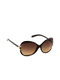

In [60]:
Image(file_names[suggestion[0][1]])

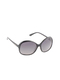

In [61]:
Image(file_names[suggestion[0][2]])

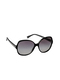

In [62]:
Image(file_names[suggestion[0][3]])

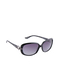

In [63]:
Image(file_names[suggestion[0][4]])